In [2]:
import pandas as pd
import seaborn as sns
 
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import (pairwise_tukeyhsd, MultiComparison)
import dataframe_image as dfi

from utils import *
from scipy.stats import mannwhitneyu, normaltest

from statannotations.Annotator import Annotator


In [4]:
#df_Wstiff = pd.read_excel('WormStif_20220201.xls')
#ax = sns.barplot(x="Genotype", y="Stiffness(N/m)", hue="Treatment", data=df_Wstiff)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=0, horizontalalignment='right')
#ax.figure.savefig('WormStiff20220201.tiff',dpi=100)

# Plotting and Statistical test source:
https://github.com/trevismd/statannotations-tutorials/blob/main/Tutorial_1/Statannotations-Tutorial-1.ipynb
and:
https://github.com/trevismd/statannotations
and:
https://github.com/trevismd/statannotations/blob/master/usage/example.ipynb

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

5 mM vs. 8 mM: Custom statistical test, P_val:7.316e-03
8 mM vs. 10 mM: Custom statistical test, P_val:1.227e-04
Regular vs. 8 mM: Custom statistical test, P_val:3.658e-04
5 mM vs. 10 mM: Custom statistical test, P_val:8.103e-02
8 mM vs. 30 mM: Custom statistical test, P_val:1.311e-02


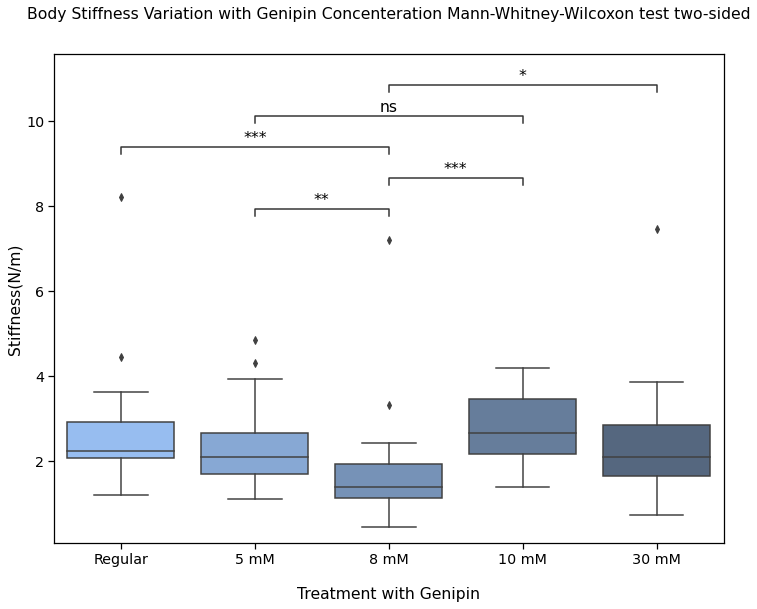

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

5 mM vs. 8 mM: Custom statistical test, P_val:7.316e-03
8 mM vs. 10 mM: Custom statistical test, P_val:1.227e-04
Regular vs. 8 mM: Custom statistical test, P_val:3.658e-04
5 mM vs. 10 mM: Custom statistical test, P_val:8.103e-02
8 mM vs. 30 mM: Custom statistical test, P_val:1.311e-02


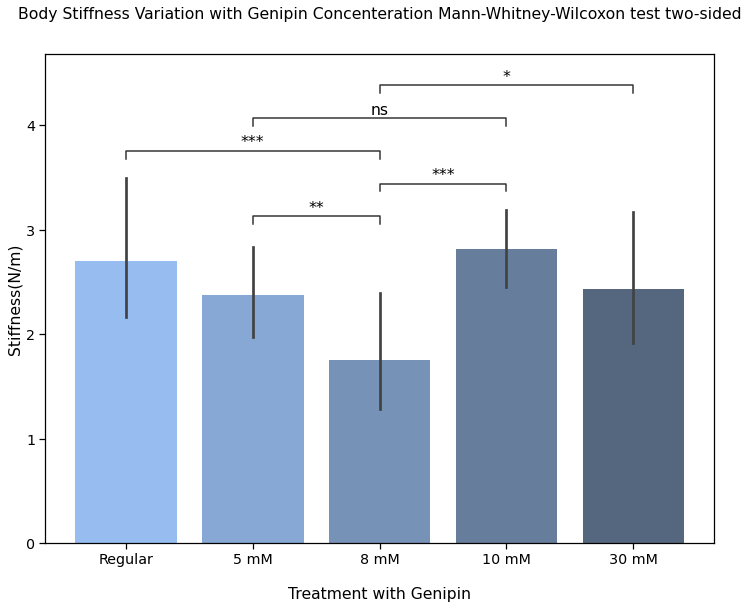

In [32]:
df_Wstiff = pd.read_excel('WormStif_20220420.xls')
rfs = df_Wstiff.loc[(df_Wstiff.Treatment.isin(("Regular", "5 mM", "8 mM", "10 mM", "30 mM"))), :]

subcat_paletteE = sns.dark_palette("#8BF", reverse=True, n_colors=8)
subcat_order = ['Regular', '5 mM', '8 mM', '10 mM', '30 mM']

Regu = rfs.loc[(rfs.Treatment == "Regular"), "Stiffness(N/m)"].values
C05mM = rfs.loc[(rfs.Treatment == "5 mM"), "Stiffness(N/m)"].values
C08mM = rfs.loc[(rfs.Treatment == "8 mM"), "Stiffness(N/m)"].values
C10mM = rfs.loc[(rfs.Treatment == "10 mM"), "Stiffness(N/m)"].values
C30mM = rfs.loc[(rfs.Treatment == "30 mM"), "Stiffness(N/m)"].values

stat_results = [#mannwhitneyu(Regu, C05mM, alternative="two-sided"),
                mannwhitneyu(Regu, C08mM, alternative="two-sided"),
               # mannwhitneyu(Regu, C10mM, alternative="two-sided"),
               # mannwhitneyu(Regu, C30mM, alternative="two-sided"),
                mannwhitneyu(C05mM, C08mM, alternative="two-sided"),
                mannwhitneyu(C05mM, C10mM, alternative="two-sided"),
               # mannwhitneyu(C05mM, C30mM, alternative="two-sided"),
                mannwhitneyu(C08mM, C10mM, alternative="two-sided"),
                mannwhitneyu(C08mM, C30mM, alternative="two-sided"),
               # mannwhitneyu(C10mM, C30mM, alternative="two-sided")
]

pvalues = [result.pvalue for result in stat_results]

plotting_parameters = {
    'data':    rfs,
    'x':       'Treatment',
    'y':       'Stiffness(N/m)',
    'order':   subcat_order,
    'palette': subcat_paletteE,
}

pairs = [#('Regular', '5 mM'),
         ('Regular', '8 mM'),
         #('Regular', '10 mM'),
        # ('Regular', '30 mM'),
         ('5 mM', '8 mM'),
         ('5 mM', '10 mM'),
         #('5 mM', '30 mM'),
         ('8 mM', '10 mM'),
         ('8 mM', '30 mM'),
        # ('10 mM', '30 mM')
]

def get_ax(orient="v"):
    if orient == "v":
        figsize = (12, 9)
        set_scale = "set_yscale"
    else:
        figsize = (10, 8)
        set_scale = "set_xscale"
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    fig.patch.set_alpha(1)
    getattr(ax, set_scale)("linear")
    return ax

def label_plot(ax):
    plt.title("Body Stiffness Variation with Genipin Concenteration Mann-Whitney-Wilcoxon test two-sided", y=1.06)
    ax.set_ylabel("Stiffness(N/m)")
    ax.set_xlabel("Treatment with Genipin", labelpad=20)

with sns.plotting_context("notebook", font_scale=1.3):
    # Create new plot
    ax = get_ax()

    # Plot with seaborn
    sns.boxplot(ax=ax, **plotting_parameters)

    # Add annotations
    annotator = Annotator(ax, pairs, **plotting_parameters)
    annotator.set_pvalues(pvalues)
    annotator.annotate()

    # Label and show
    label_plot(ax)
    plt.savefig("./plotBOX_MWW.tiff", bbox_inches='tight',dpi=100)
    #ax.figure.savefig('WormStiff20220201.tiff',dpi=100)
    plt.show()
    
with sns.plotting_context("notebook", font_scale=1.3):
    # Create new plot
    ax = get_ax()

    # Plot with seaborn
    sns.barplot(ax=ax, **plotting_parameters)

    # Add annotations
    annotator = Annotator(ax, pairs, **plotting_parameters)
    annotator.set_pvalues(pvalues)
    
    annotator.annotate()

    # Label and show
    label_plot(ax)
    plt.savefig("./plotBAR_MWW.tiff", bbox_inches='tight',dpi=100)
    plt.show()

# A Diffrent method might be easier

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Regular vs. 5 mM: Kruskal-Wallis independent samples (pairwise between groups), P_val:4.171e-01 Stat=6.585e-01
5 mM vs. 8 mM: Kruskal-Wallis independent samples (pairwise between groups), P_val:7.045e-03 Stat=7.262e+00
8 mM vs. 10 mM: Kruskal-Wallis independent samples (pairwise between groups), P_val:1.166e-04 Stat=1.485e+01
10 mM vs. 30 mM: Kruskal-Wallis independent samples (pairwise between groups), P_val:9.893e-02 Stat=2.723e+00
Regular vs. 8 mM: Kruskal-Wallis independent samples (pairwise between groups), P_val:3.487e-04 Stat=1.279e+01
5 mM vs. 10 mM: Kruskal-Wallis independent samples (pairwise between groups), P_val:7.870e-02 Stat=3.091e+00
8 mM vs. 30 mM: Kruskal-Wallis independent samples (pairwise between groups), P_val:1.266e-02 Stat=6.216e+00
Regular vs. 10 mM: Kruskal-Wallis independent sample

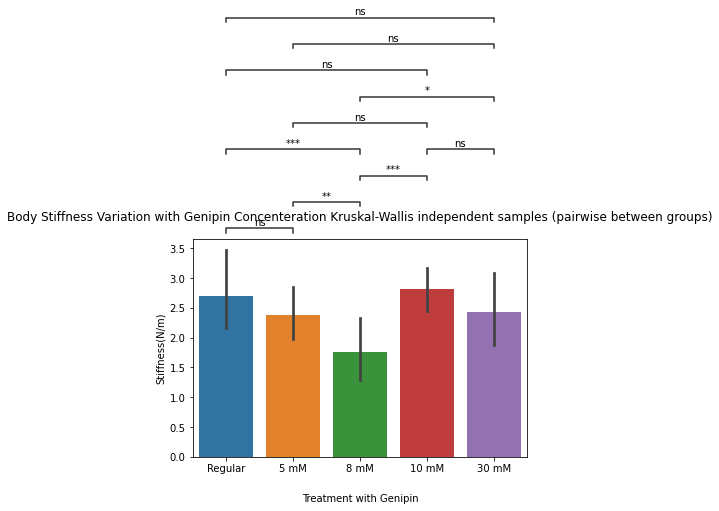

In [6]:
x = "Treatment"
y = "Stiffness(N/m)"
order = ['Regular', '5 mM', '8 mM', '10 mM', '30 mM']#['Sun', 'Thur', 'Fri', 'Sat']
ax = sns.barplot(data=df_Wstiff, x=x, y=y, order=order)
annot = Annotator(ax, [("Regular", "5 mM"), ("Regular", "8 mM"), ("Regular", "10 mM"),("Regular", "30 mM"),("5 mM", "8 mM"),
                      ("5 mM", "10 mM"),("5 mM", "30 mM"),("8 mM", "10 mM"),("8 mM", "30 mM"),("10 mM", "30 mM"),], data=df_Wstiff, x=x, y=y, order=order)

#test value should be a StatTest instance or one of the following strings: t-test_ind, t-test_welch, t-test_paired, Mann-Whitney, Mann-Whitney-gt, Mann-Whitney-ls, Levene, Wilcoxon, Kruskal.
annot.configure(test='Kruskal', text_format='star', loc='outside', verbose=2)
annot.apply_test()
ax, test_results = annot.annotate()


def label_plot(ax):
    plt.title("Body Stiffness Variation with Genipin Concenteration Kruskal-Wallis independent samples (pairwise between groups)", y=1.06)
    ax.set_ylabel("Stiffness(N/m)")
    ax.set_xlabel("Treatment with Genipin", labelpad=20)

label_plot(ax)
plt.savefig('plotBAR_Kruskal.tiff', dpi=100, bbox_inches='tight')

## Below is the example data plotting

In [7]:
# dataset = pd.read_csv('/Users/erezaei/Desktop/SU-Research/Falcon_Local/Analysis_N2_Genipin/Kickstarter+Projects/kickstarter_projects.csv')
# #dataset.head()
# #list(dataset.Category.unique())
# tech = dataset.loc[(dataset.Category=='Technology'), :]
# #print_projects_by(tech, "Goal", "sum")

# rfs = tech.loc[(tech.Subcategory.isin(("Robots", "Flight", "Sound"))), :]
# #print_n_projects(rfs, "rfs")

# subcat_palette = sns.dark_palette("#8BF", reverse=True, n_colors=5)
# states_palette = sns.color_palette("YlGnBu", n_colors=5)

# states_order = ["Successful", "Failed", "Live", "Suspended", "Canceled"]
# subcat_order = ['Robots', 'Flight', 'Sound']

# with sns.plotting_context("notebook", font_scale=1.4):
#     # Create new plot
#     ax = get_log_ax()

#     sns.boxplot(ax=ax, data=rfs, x='Subcategory', y='Goal', palette=subcat_palette,
#                 order=subcat_order)

#     label_plot_for_subcats(ax)
#     plt.savefig("plot1.png", bbox_inches='tight')
    

    
# robots = rfs.loc[(rfs.Subcategory == "Robots"), "Goal"].values
# flight = rfs.loc[(rfs.Subcategory == "Flight"), "Goal"].values
# sound = rfs.loc[(rfs.Subcategory == "Sound"), "Goal"].values

# log_robots = np.log(robots)
# log_flight = np.log(flight)
# log_sound = np.log(sound)

# describe_array(robots, "Robots")
# describe_array(flight, "Flight")
# describe_array(sound, "Sound")
# print()
# describe_array(log_robots, "Log(Robots)")
# describe_array(log_flight, "Log(Flight)")
# describe_array(log_sound, "Log(Sound)")

# print("Robots: ", normaltest(robots).pvalue)
# print("Flight: ", normaltest(flight).pvalue)
# print("Sound: ", normaltest(sound).pvalue)
# print()
# print("Log(robots): ", normaltest(log_robots).pvalue)
# print("Log(Flight): ", normaltest(log_flight).pvalue)
# print("Log(Sound): ", normaltest(log_sound).pvalue)

# # pvalues with scipy:
# stat_results = [mannwhitneyu(robots, flight, alternative="two-sided"),
#                 mannwhitneyu(flight, sound, alternative="two-sided"),
#                 mannwhitneyu(robots, sound, alternative="two-sided")]

# print("Robots vs Flight: ", stat_results[0])
# print("Flight vs Sound: ", stat_results[1])
# print("robots vs Sound: ", stat_results[2])

# pvalues = [result.pvalue for result in stat_results]


# # Putting the parameters in a dictionary avoids code duplication
# # since we use the same for `sns.boxplot` and `Annotator` calls
# plotting_parameters = {
#     'data':    rfs,
#     'x':       'Subcategory',
#     'y':       'Goal',
#     'order':   subcat_order,
#     'palette': subcat_palette,
# }

# pairs = [('Robots', 'Flight'),
#          ('Flight', 'Sound'),
#          ('Robots', 'Sound')]

# formatted_pvalues = [f"p={p:.2e}" for p in pvalues]

# with sns.plotting_context('notebook', font_scale=1.4):
#     # Create new plot
#     ax = get_log_ax()

#     # Plot with seaborn
#     sns.boxplot(**plotting_parameters)

#     # Add annotations
#     annotator = Annotator(ax, pairs, **plotting_parameters)
#     annotator.set_custom_annotations(formatted_pvalues)
#     annotator.annotate()

#     # Label and show
#     label_plot_for_subcats(ax)
#     plt.savefig("./plot1A.png", bbox_inches='tight')
#     plt.show()
    
    
# with sns.plotting_context("notebook", font_scale=1.4):
#     # Create new plot
#     ax = get_log_ax()

#     # Plot with seaborn
#     sns.boxplot(ax=ax, **plotting_parameters)

#     # Add annotations
#     annotator = Annotator(ax, pairs, **plotting_parameters)
#     annotator.set_pvalues(pvalues)
#     annotator.annotate()

#     # Label and show
#     label_plot_for_subcats(ax)
#     plt.show()

## Below is the Tukeys test table 

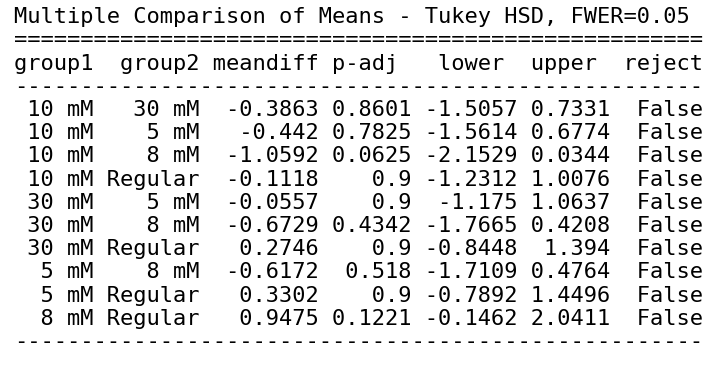

In [8]:
mask = df_Wstiff['Genotype']=='wild type'
Geno_data = df_Wstiff[mask]
MultiComp = MultiComparison(Geno_data['Stiffness(N/m)'], Geno_data['Treatment'])
# Show all pair-wise comparisons:
# Print the comparisons
#print(MultiComp.tukeyhsd().summary())
plt.rc('figure', figsize=(12, 5))
plt.text(0.01, 0.05, str(MultiComp.tukeyhsd().summary()), {'fontsize': 22}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.savefig('Tukeys_Loc.tiff',dpi=300)

## Test the normal distribution of data, the greater vaues means normality. Values below 0.05 not considered to be normally distributed 

In [23]:
print("Regular: ", normaltest(Regular).pvalue)
print("5 mM: ", normaltest(C05mM).pvalue)
print("8 mM: ", normaltest(C08mM).pvalue)
print("10 mM: ", normaltest(C10mM).pvalue)
print("30 mM: ", normaltest(C30mM).pvalue)
print()

NameError: name 'Regular' is not defined

# Force vs. Indentation

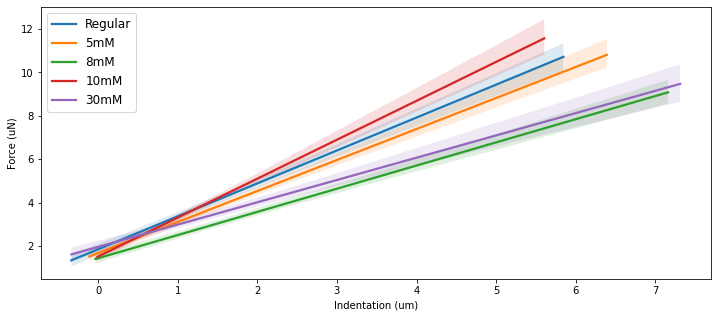

In [10]:
df_ForcInd = pd.read_excel('Forc_Ind_20220420.xls')

ax = sns.regplot(x="Ind00mM", y="Forc00Mm",  scatter=False,data=df_ForcInd,label="Regular")
ax1 = sns.regplot(x="Ind05mM", y="Forc05Mm",scatter=False, data=df_ForcInd,label="5mM")
ax2 = sns.regplot(x="Ind08mM", y="Forc08Mm", scatter=False,data=df_ForcInd,label="8mM")
ax3 = sns.regplot(x="Ind10mM", y="Forc10Mm", scatter=False,data=df_ForcInd,label="10mM")
ax4 = sns.regplot(x="Ind30mM", y="Forc30Mm", scatter=False,data=df_ForcInd,label="30mM")
#scatter=False,
ax.set(
        #title='The Correlation between Age and Charge Amount',
        xlabel='Indentation (um)',
        ylabel='Force (uN)')

ax.legend(fontsize=12)
ax.figure.savefig('ForVInd_Genipin3.tiff',dpi=100)

### January 2022 Analysis of the Regular, 5mM, and 10mM of Genipin body stiffness
#### And now the data for 8 mM and 30 mM are also included

In [11]:
df_BodyStif = pd.read_excel('/Users/erezaei/Desktop/SU-Research/Falcon_Local/Analysis_N2_Genipin/Forc_Ind_Vector_20220420.xls')

In [12]:
col_Genotype_list = df_BodyStif['Genotype'].tolist()
Genotype_list = list(dict.fromkeys(col_Genotype_list))

result_ind = np.array([])
result_for = np.array([])
ind_list = []
for_list = []
df_al = pd.DataFrame({ })
df_all=pd.DataFrame({ })

for Geno in Genotype_list:
    df_Geno=df_BodyStif[df_BodyStif["Genotype"].str.contains(Geno)]
    Treat_list = list(dict.fromkeys(df_Geno['Treatm'].tolist()))
    
    for Treat in Treat_list:
        df_indA=np.array([])
        df_ForA=np.array([])
        df_Treat=df_Geno[df_Geno["Treatm"].str.contains(Treat)]
        leng= int(df_Treat["Ind"].size/15)
        
        for i in range (1,leng+1):
            df_mask=df_Treat[df_Treat["WormNo"]==i]
            df_ind= df_mask["Ind"].to_numpy()
            df_For= df_mask["Force"].to_numpy()
            df_ForA = np.append(df_ForA,df_mask["Force"].to_numpy(), axis=0)
            df_indA = np.append(df_indA,df_mask["Ind"].to_numpy(), axis=0)
            
        indent = np.reshape(df_indA, (leng,15)) 
        force = np.reshape(df_ForA, (leng,15))
        ind_mean_std = np.array([np.mean(indent, axis=0), np.std(indent, axis=0)])
        for_mean_std = np.array([np.mean(force, axis=0), np.std(force, axis=0)])
        sort_ind = ind_mean_std [ :, ind_mean_std[0].argsort()]
        sort_for = for_mean_std [ :, for_mean_std[0].argsort()]
        ind_list.append(sort_ind.T)
        for_list.append(sort_for.T)
        df_al=df_al.append(pd.DataFrame({'ind_mean'+Geno+Treat: sort_ind[0, :], 'ind_std'+Geno+Treat: sort_ind[1, :],'for_mean'+Geno+Treat: sort_for[0, :],'for_std'+Geno+Treat: sort_for[1, :]}), ignore_index = False)
        df_all = df_al.apply(lambda x: pd.Series(x.dropna().values))
#print(df_all)

## The Force vs. Indent. figure has the  average of indentation values

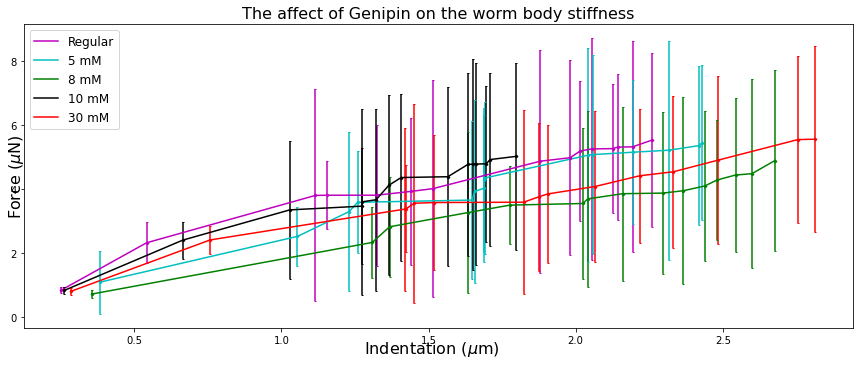

In [13]:
#fig, axs = plt.subplots(1,2,sharex=True,sharey=True)
fig= plt.figure()
Genotype_listN=['wild type']
Treat_listN=['Regular', '5 mM','8 mM','10 mM','30 mM'] 
colorr=['m','c','g','k','r']


#axs = axs.flatten()
for ii in range(0,1):
    for jj in range(0,5):
    
        ind_v = np.array(df_all.iloc[:, 0+4*jj+ii*12:1+4*jj+ii*12])
        forc_v = np.array(df_all.iloc[:, 2+4*jj+ii*12:3+4*jj+ii*12])
        ind_er = np.array(df_all.iloc[:, 1+4*jj+ii*12:2+4*jj+ii*12])
        forc_er = np.array(df_all.iloc[:, 3+4*jj+ii*12:4+4*jj+ii*12])
        plt.plot(ind_v, forc_v,color =colorr[jj], label=Treat_listN[jj] )
        plt.errorbar(ind_v, forc_v, yerr=forc_er.ravel(),fmt='D', markersize=2, capsize=1,color =colorr[jj])
       
 ##    plt.set_title( '$\it{%s}$'%Genotype_listN[ii],fontsize=9)
plt.title('The affect of Genipin on the worm body stiffness',fontsize=16)        
fig.tight_layout()
fig.text(0.5, 0.02, 'Indentation ($\mu$m)', ha='center', va='center',fontsize=16)
fig.text(0.02, 0.5, 'Force ($\mu$N)', ha='center', va='center', rotation='vertical',fontsize=16)
plt.legend(fontsize=12)
fig.savefig('Foc_Ind_GenipinMarch2022.tif',dpi=100)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

5 mM vs. 8 mM: Custom statistical test, P_val:7.316e-03
8 mM vs. 10 mM: Custom statistical test, P_val:1.227e-04
Regular vs. 8 mM: Custom statistical test, P_val:3.658e-04
5 mM vs. 10 mM: Custom statistical test, P_val:8.103e-02
8 mM vs. 30 mM: Custom statistical test, P_val:1.311e-02


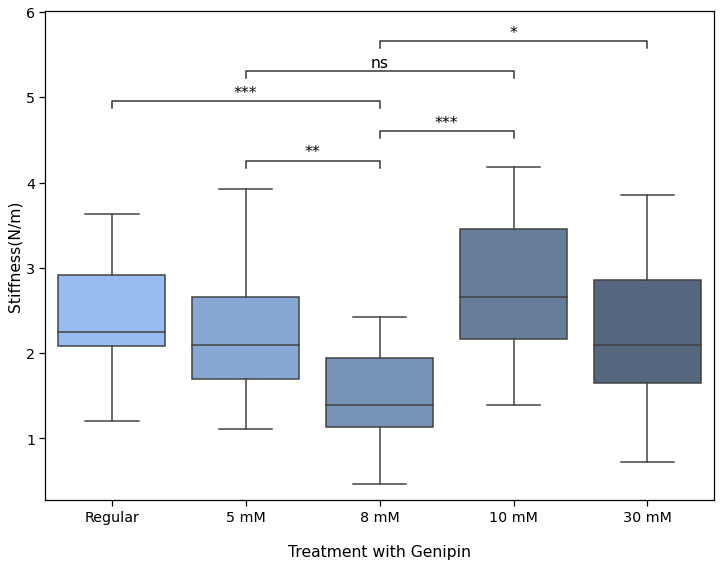

In [30]:
df_Wstiff = pd.read_excel('WormStif_20220420.xls')
rfs = df_Wstiff.loc[(df_Wstiff.Treatment.isin(("Regular", "5 mM", "8 mM", "10 mM", "30 mM"))), :]

subcat_paletteE = sns.dark_palette("#8BF", reverse=True, n_colors=8)
subcat_order = ['Regular', '5 mM', '8 mM', '10 mM', '30 mM']
#subcat_order = [(0,0),(5,5),(8,8),(10,10),(30,30)]

Regu = rfs.loc[(rfs.Treatment == "Regular"), "Stiffness(N/m)"].values
C05mM = rfs.loc[(rfs.Treatment == "5 mM"), "Stiffness(N/m)"].values
C08mM = rfs.loc[(rfs.Treatment == "8 mM"), "Stiffness(N/m)"].values
C10mM = rfs.loc[(rfs.Treatment == "10 mM"), "Stiffness(N/m)"].values
C30mM = rfs.loc[(rfs.Treatment == "30 mM"), "Stiffness(N/m)"].values

stat_results = [#mannwhitneyu(Regu, C05mM, alternative="two-sided"),
                mannwhitneyu(Regu, C08mM, alternative="two-sided"),
                #mannwhitneyu(Regu, C10mM, alternative="two-sided"),
                #mannwhitneyu(Regu, C30mM, alternative="two-sided"),
                mannwhitneyu(C05mM, C08mM, alternative="two-sided"),
                mannwhitneyu(C05mM, C10mM, alternative="two-sided"),
                #mannwhitneyu(C05mM, C30mM, alternative="two-sided"),
                mannwhitneyu(C08mM, C10mM, alternative="two-sided"),
                mannwhitneyu(C08mM, C30mM, alternative="two-sided"),
                #mannwhitneyu(C10mM, C30mM, alternative="two-sided")
]

pvalues = [result.pvalue for result in stat_results]

plotting_parameters = {
    'data':    rfs,
    'x':       'Treatment',
    'y':       'Stiffness(N/m)',
    'order':   subcat_order,
    'palette': subcat_paletteE,
}

pairs = [#('Regular', '5 mM'),
         ('Regular', '8 mM'),
         #('Regular', '10 mM'),
         #('Regular', '30 mM'),
         ('5 mM', '8 mM'),
         ('5 mM', '10 mM'),
         #('5 mM', '30 mM'),
         ('8 mM', '10 mM'),
         ('8 mM', '30 mM'),
         #('10 mM', '30 mM')
]

def get_ax(orient="v"):
    if orient == "v":
        figsize = (12, 9)
        set_scale = "set_yscale"
    else:
        figsize = (10, 8)
        set_scale = "set_xscale"
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    fig.patch.set_alpha(1)
    getattr(ax, set_scale)("linear")
    return ax

def label_plot(ax):
    #plt.title("Body Stiffness Variation with Genipin Concenteration Mann-Whitney-Wilcoxon test two-sided", y=1.06)
    #ax.set_ylabel("Stiffness(N/m)")
    ax.set_xlabel("Treatment with Genipin", labelpad=20)

with sns.plotting_context("notebook", font_scale=1.3):
    # Create new plot
    ax = get_ax()

    # Plot with seaborn
    sns.boxplot(ax=ax, **plotting_parameters, showfliers=False)

    #Add annotations
    annotator = Annotator(ax, pairs, **plotting_parameters)
    annotator.set_pvalues(pvalues)
    annotator.annotate()

    # Label and show
    label_plot(ax)
    plt.savefig("./plotBOX_M0W.tiff", bbox_inches='tight',dpi=100)
    #ax.figure.savefig('WormStiff20220201.tiff',dpi=100)
    plt.show()

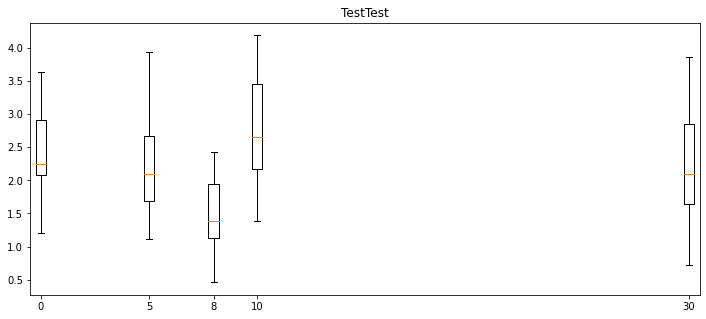

In [15]:
data = [Regu,C05mM, C08mM, C10mM, C30mM]
fig09, ax09 = plt.subplots()
ax09.set_title('TestTest')
ax09.boxplot(data, positions=[0,5,8,10,30], showfliers=False)

#Add annotations 
# annotator = Annotator(ax09, pairs, **plotting_parameters)
# annotator.set_pvalues(pvalues)
# annotator.annotate()
    
plt.show()

# 8mM treatment with time

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

6m vs. 30m: Custom statistical test, P_val:6.669e-01
30m vs. 60m: Custom statistical test, P_val:4.007e-02
60m vs. 120m: Custom statistical test, P_val:6.531e-01
120m vs. 180m: Custom statistical test, P_val:6.235e-04
30m vs. 120m: Custom statistical test, P_val:2.336e-03


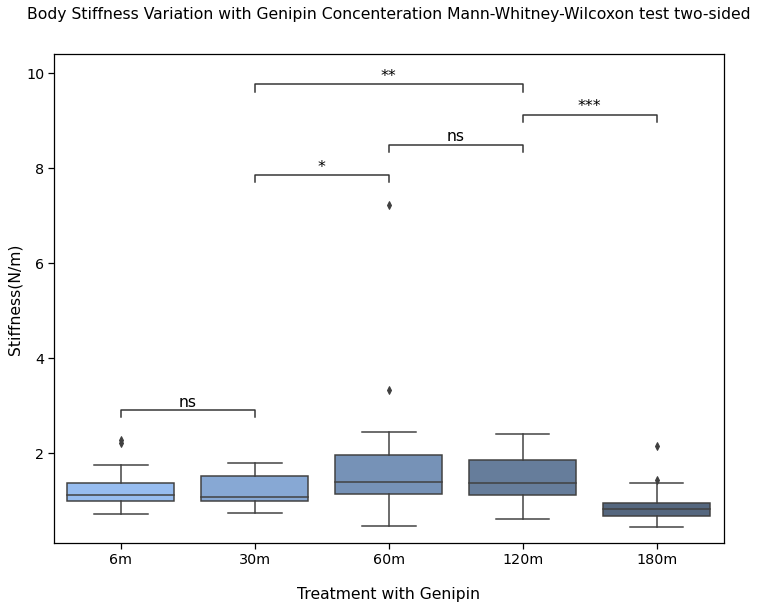

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

6m vs. 30m: Custom statistical test, P_val:6.669e-01
30m vs. 60m: Custom statistical test, P_val:4.007e-02
60m vs. 120m: Custom statistical test, P_val:6.531e-01
120m vs. 180m: Custom statistical test, P_val:6.235e-04
30m vs. 120m: Custom statistical test, P_val:2.336e-03


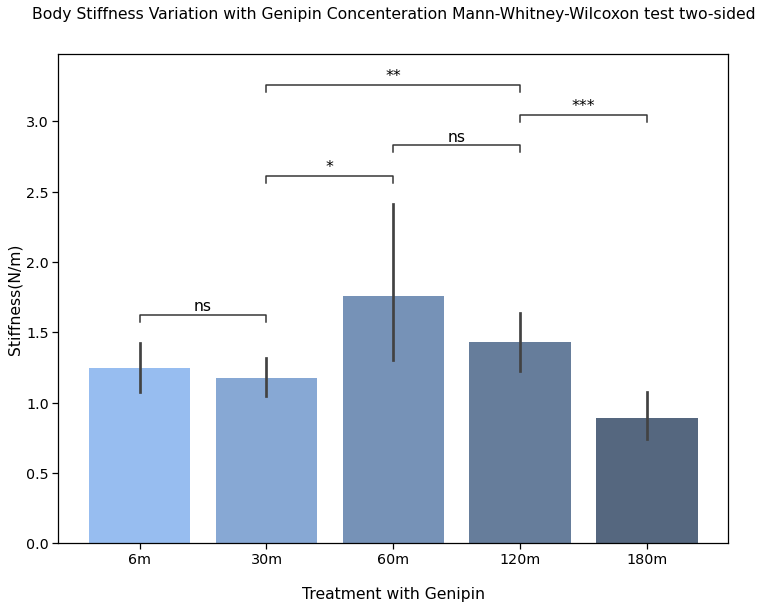

In [34]:
df_Wstiff = pd.read_excel('WormStif_20220420_8mMtime.xls')
rfs = df_Wstiff.loc[(df_Wstiff.Treatment.isin(("6m", "30m", "60m", "120m", "180m"))), :]

subcat_paletteE = sns.dark_palette("#8BF", reverse=True, n_colors=8)
subcat_order = ['6m', '30m', '60m', '120m', '180m']

Regu = rfs.loc[(rfs.Treatment == "6m"), "Stiffness(N/m)"].values
C05mM = rfs.loc[(rfs.Treatment == "30m"), "Stiffness(N/m)"].values
C08mM = rfs.loc[(rfs.Treatment == "60m"), "Stiffness(N/m)"].values
C10mM = rfs.loc[(rfs.Treatment == "120m"), "Stiffness(N/m)"].values
C30mM = rfs.loc[(rfs.Treatment == "180m"), "Stiffness(N/m)"].values

stat_results = [mannwhitneyu(Regu, C05mM, alternative="two-sided"),
                #mannwhitneyu(Regu, C08mM, alternative="two-sided"),
                #mannwhitneyu(Regu, C10mM, alternative="two-sided"),
                #mannwhitneyu(Regu, C30mM, alternative="two-sided"),
                mannwhitneyu(C05mM, C08mM, alternative="two-sided"),
               # mannwhitneyu(C05mM, C10mM, alternative="two-sided"),
                mannwhitneyu(C05mM, C30mM, alternative="two-sided"),
                mannwhitneyu(C08mM, C10mM, alternative="two-sided"),
               # mannwhitneyu(C08mM, C30mM, alternative="two-sided"),
                mannwhitneyu(C10mM, C30mM, alternative="two-sided")]

pvalues = [result.pvalue for result in stat_results]

plotting_parameters = {
    'data':    rfs,
    'x':       'Treatment',
    'y':       'Stiffness(N/m)',
    'order':   subcat_order,
    'palette': subcat_paletteE,
}

pairs = [('6m', '30m'),
         #('6m', '60m'),
         #('6m', '120m'),
         #('6m', '180m'),
         ('30m', '60m'),
         ('30m', '120m'),
         #('30m', '180m'),
         ('60m', '120m'),
         #('60m', '180m'),
         ('120m', '180m')]

def get_ax(orient="v"):
    if orient == "v":
        figsize = (12, 9)
        set_scale = "set_yscale"
    else:
        figsize = (10, 8)
        set_scale = "set_xscale"
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    fig.patch.set_alpha(1)
    getattr(ax, set_scale)("linear")
    return ax

def label_plot(ax):
    plt.title("Body Stiffness Variation with Genipin Concenteration Mann-Whitney-Wilcoxon test two-sided", y=1.06)
    ax.set_ylabel("Stiffness(N/m)")
    ax.set_xlabel("Treatment with Genipin", labelpad=20)

with sns.plotting_context("notebook", font_scale=1.3):
    # Create new plot
    ax = get_ax()

    # Plot with seaborn
    sns.boxplot(ax=ax, **plotting_parameters)

    # Add annotations
    annotator = Annotator(ax, pairs, **plotting_parameters)
    annotator.set_pvalues(pvalues)
    annotator.annotate()

    # Label and show
    label_plot(ax)
    plt.savefig("./plotBOX_MWW_8mM.tiff", bbox_inches='tight',dpi=100)
    #ax.figure.savefig('WormStiff20220201.tiff',dpi=100)
    plt.show()
    
with sns.plotting_context("notebook", font_scale=1.3):
    # Create new plot
    ax = get_ax()

    # Plot with seaborn
    sns.barplot(ax=ax, **plotting_parameters)

    # Add annotations
    annotator = Annotator(ax, pairs, **plotting_parameters)
    annotator.set_pvalues(pvalues)
    
    annotator.annotate()

    # Label and show
    label_plot(ax)
    plt.savefig("./plotBAR_MWW_8mM.tiff", bbox_inches='tight',dpi=100)
    plt.show()

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

6m vs. 30m: Kruskal-Wallis independent samples (pairwise between groups), P_val:6.575e-01 Stat=1.966e-01
30m vs. 60m: Kruskal-Wallis independent samples (pairwise between groups), P_val:3.890e-02 Stat=4.265e+00
60m vs. 120m: Kruskal-Wallis independent samples (pairwise between groups), P_val:6.443e-01 Stat=2.131e-01
120m vs. 180m: Kruskal-Wallis independent samples (pairwise between groups), P_val:5.953e-04 Stat=1.179e+01
6m vs. 60m: Kruskal-Wallis independent samples (pairwise between groups), P_val:8.226e-02 Stat=3.020e+00
30m vs. 120m: Kruskal-Wallis independent samples (pairwise between groups), P_val:4.830e-02 Stat=3.900e+00
60m vs. 180m: Kruskal-Wallis independent samples (pairwise between groups), P_val:5.120e-04 Stat=1.207e+01
6m vs. 120m: Kruskal-Wallis independent samples (pairwise between groups),

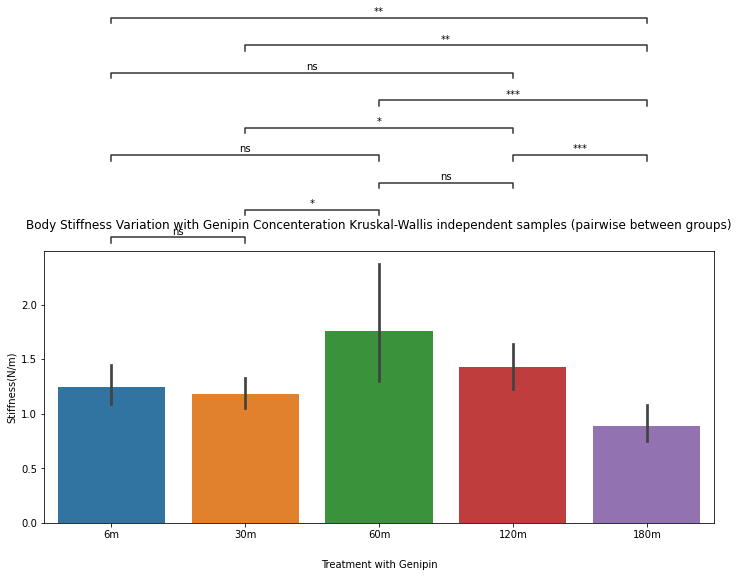

In [17]:
x = "Treatment"
y = "Stiffness(N/m)"
order = ['6m', '30m', '60m', '120m', '180m']#['Sun', 'Thur', 'Fri', 'Sat']
ax = sns.barplot(data=df_Wstiff, x=x, y=y, order=order)
annot = Annotator(ax, [('6m', '30m'), ('6m', '60m'), ('6m', '120m'), ('6m', '180m'), ('30m', '60m'), ('30m', '120m'),
         ('30m', '180m'), ('60m', '120m'), ('60m', '180m'), ('120m', '180m')], data=df_Wstiff, x=x, y=y, order=order)


#test value should be a StatTest instance or one of the following strings: t-test_ind, t-test_welch, t-test_paired, Mann-Whitney, Mann-Whitney-gt, Mann-Whitney-ls, Levene, Wilcoxon, Kruskal.
annot.configure(test='Kruskal', text_format='star', loc='outside', verbose=2)
annot.apply_test()
ax, test_results = annot.annotate()


def label_plot(ax):
    plt.title("Body Stiffness Variation with Genipin Concenteration Kruskal-Wallis independent samples (pairwise between groups)", y=1.06)
    ax.set_ylabel("Stiffness(N/m)")
    ax.set_xlabel("Treatment with Genipin", labelpad=20)

label_plot(ax)
plt.savefig('plotBAR_Kruskal_8mM.tiff', dpi=100, bbox_inches='tight')

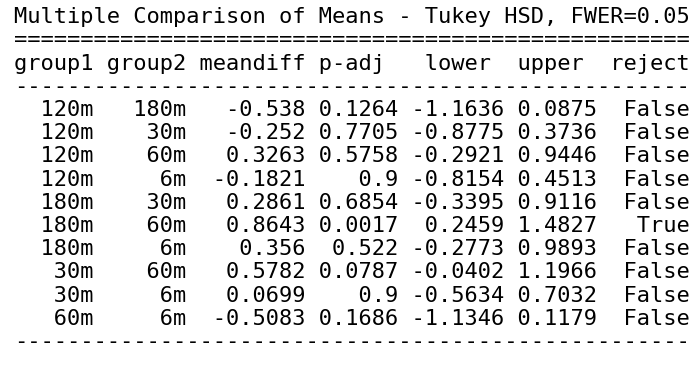

In [18]:
mask = df_Wstiff['Genotype']=='wild type'
Geno_data = df_Wstiff[mask]
MultiComp = MultiComparison(Geno_data['Stiffness(N/m)'], Geno_data['Treatment'])
# Show all pair-wise comparisons:
# Print the comparisons
#print(MultiComp.tukeyhsd().summary())
plt.rc('figure', figsize=(12, 5))
plt.text(0.01, 0.05, str(MultiComp.tukeyhsd().summary()), {'fontsize': 22}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.savefig('Tukeys_Loc_8mMtime.tiff',dpi=300)

## Force Indentation 8mM time

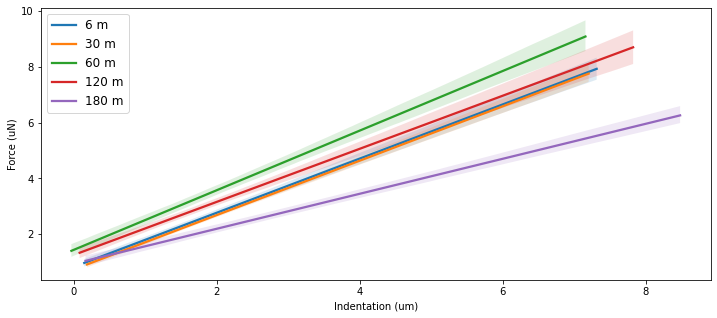

In [19]:
df_ForcInd = pd.read_excel('Forc_Ind_20220420_8mMtime.xls')

ax = sns.regplot(x="Ind8mM6m", y="Forc8mM6m",  scatter=False,data=df_ForcInd,label="6 m")
ax1 = sns.regplot(x="Ind8mM30m", y="Forc8mM30m",scatter=False, data=df_ForcInd,label="30 m")
ax2 = sns.regplot(x="Ind8mM1h", y="Forc8mM1h", scatter=False,data=df_ForcInd,label="60 m")
ax3 = sns.regplot(x="Ind8mM2h", y="Forc8mM2h", scatter=False,data=df_ForcInd,label="120 m")
ax4 = sns.regplot(x="Ind8mM3h", y="Forc8mM3h", scatter=False,data=df_ForcInd,label="180 m")
#scatter=False,
ax.set(
        #title='The Correlation between Age and Charge Amount',
        xlabel='Indentation (um)',
        ylabel='Force (uN)')

ax.legend(fontsize=12)
ax.figure.savefig('ForVInd_Geni8mMtime.tiff',dpi=100)

In [20]:
df_BodyStif = pd.read_excel('/Users/erezaei/Desktop/SU-Research/Falcon_Local/Analysis_N2_Genipin/Forc_Ind_Vector_20220420_8mMtime.xls')
col_Genotype_list = df_BodyStif['Genotype'].tolist()
Genotype_list = list(dict.fromkeys(col_Genotype_list))

result_ind = np.array([])
result_for = np.array([])
ind_list = []
for_list = []
df_al = pd.DataFrame({ })
df_all=pd.DataFrame({ })

for Geno in Genotype_list:
    df_Geno=df_BodyStif[df_BodyStif["Genotype"].str.contains(Geno)]
    Treat_list = list(dict.fromkeys(df_Geno['Treatm'].tolist()))
    
    for Treat in Treat_list:
        df_indA=np.array([])
        df_ForA=np.array([])
        df_Treat=df_Geno[df_Geno["Treatm"].str.contains(Treat)]
        leng= int(df_Treat["Ind"].size/15)
        
        for i in range (1,leng+1):
            df_mask=df_Treat[df_Treat["WormNo"]==i]
            df_ind= df_mask["Ind"].to_numpy()
            df_For= df_mask["Force"].to_numpy()
            df_ForA = np.append(df_ForA,df_mask["Force"].to_numpy(), axis=0)
            df_indA = np.append(df_indA,df_mask["Ind"].to_numpy(), axis=0)
            
        indent = np.reshape(df_indA, (leng,15)) 
        force = np.reshape(df_ForA, (leng,15))
        ind_mean_std = np.array([np.mean(indent, axis=0), np.std(indent, axis=0)])
        for_mean_std = np.array([np.mean(force, axis=0), np.std(force, axis=0)])
        sort_ind = ind_mean_std [ :, ind_mean_std[0].argsort()]
        sort_for = for_mean_std [ :, for_mean_std[0].argsort()]
        ind_list.append(sort_ind.T)
        for_list.append(sort_for.T)
        df_al=df_al.append(pd.DataFrame({'ind_mean'+Geno+Treat: sort_ind[0, :], 'ind_std'+Geno+Treat: sort_ind[1, :],'for_mean'+Geno+Treat: sort_for[0, :],'for_std'+Geno+Treat: sort_for[1, :]}), ignore_index = False)
        df_all = df_al.apply(lambda x: pd.Series(x.dropna().values))
#print(df_all)

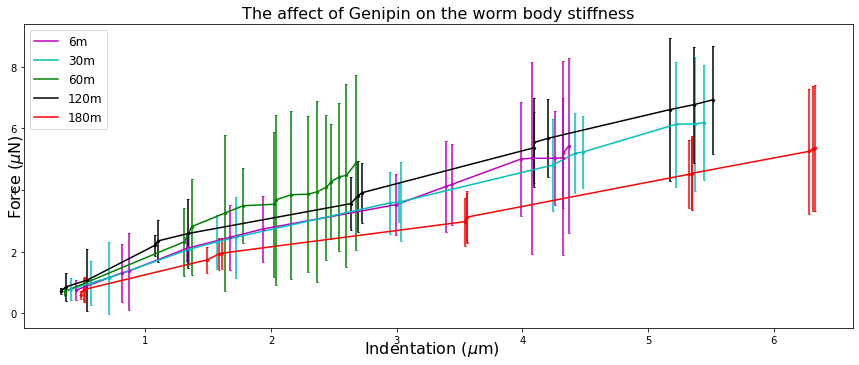

In [21]:
#fig, axs = plt.subplots(1,2,sharex=True,sharey=True)
fig= plt.figure()
Genotype_listN=['wild type']
Treat_listN=['6m', '30m','60m','120m','180m'] 
colorr=['m','c','g','k','r']


#axs = axs.flatten()
ii=0
for jj in range(0,5):

    ind_v = np.array(df_all.iloc[:, 0+4*jj+ii*12:1+4*jj+ii*12])
    forc_v = np.array(df_all.iloc[:, 2+4*jj+ii*12:3+4*jj+ii*12])
    ind_er = np.array(df_all.iloc[:, 1+4*jj+ii*12:2+4*jj+ii*12])
    forc_er = np.array(df_all.iloc[:, 3+4*jj+ii*12:4+4*jj+ii*12])
    plt.plot(ind_v, forc_v,color =colorr[jj], label=Treat_listN[jj] )
    plt.errorbar(ind_v, forc_v, yerr=forc_er.ravel(),fmt='D', markersize=2, capsize=1,color =colorr[jj])

       
 ##    plt.set_title( '$\it{%s}$'%Genotype_listN[ii],fontsize=9)
plt.title('The affect of Genipin on the worm body stiffness',fontsize=16)        
fig.tight_layout()
fig.text(0.5, 0.02, 'Indentation ($\mu$m)', ha='center', va='center',fontsize=16)
fig.text(0.02, 0.5, 'Force ($\mu$N)', ha='center', va='center', rotation='vertical',fontsize=16)
plt.legend(fontsize=12)
fig.savefig('Foc_Ind_Geni8mMtime.tif',dpi=100)

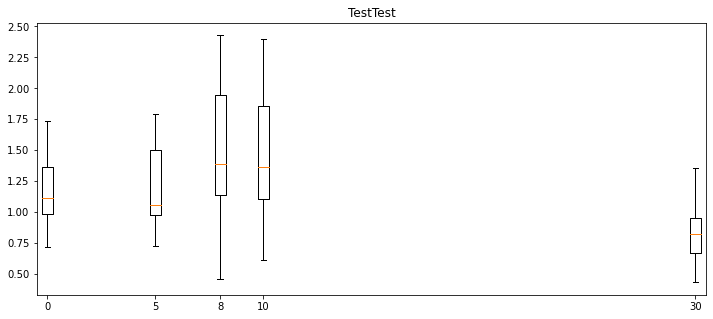

In [22]:
data = [Regu,C05mM, C08mM, C10mM, C30mM]
fig09, ax09 = plt.subplots()
ax09.set_title('TestTest')
ax09.boxplot(data, positions=[0,5,8,10,30], showfliers=False)

#Add annotations 
# annotator = Annotator(ax09, pairs, **plotting_parameters)
# annotator.set_pvalues(pvalues)
# annotator.annotate()
    
plt.show()